# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [183]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#might need to convert mouse id column to float/ string type,, in this case
mouse_metadata["Mouse ID"]=mouse_metadata["Mouse ID"].astype("str")

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID" )

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [184]:
# Checking the number of mice.
combined_data["Mouse ID"].count()
combined_data["Mouse ID"].nunique()

249

In [186]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#mouse_time = combined_data["Mouse","Timepoint"].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_time = combined_data.duplicated(["Mouse ID","Timepoint"])
duplicated_items = combined_data[mouse_time, combined_data['Mouse ID']].unique()


InvalidIndexError: (0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool, 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object)

In [187]:
# Optional: Get all the data for the duplicate mouse ID.
#.loc with a condition  
duplicated_df= combined_data.loc[combined_data["Mouse ID"]== "g989",:]
duplicated_df
#combined_data.loc[]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [188]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#.loc with a condition 
dropped_mouseid= combined_data.loc[combined_data['Mouse ID']!='g989',:]
dropped_mouseid.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [189]:
# Checking the number of mice in the clean DataFrame.
dropped_mouseid['Mouse ID'].nunique()


248

## Summary Statistics

In [190]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tum = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
med_tum = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tum = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sem_tum = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
sd_tum = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_summary= pd.DataFrame({ "Mean Tumor Volume":mean_tum,"Median Tumor Volume":med_tum,
                             "Variance Tumor Volume":var_tum,"Standard Error of Tumor":sem_tum,
                             "Standard Deviation Tumor":sd_tum})

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Error of Tumor,Standard Deviation Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.322552,50.854632,42.351070,0.512884,6.507770
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [191]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_tb = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std'] )
summary_tb

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

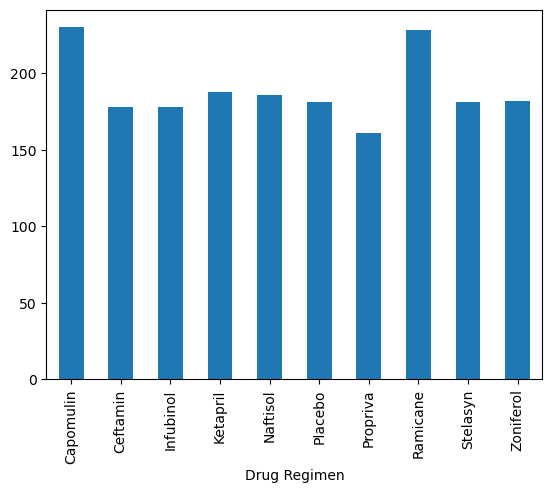

In [192]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoint= combined_data.groupby(['Drug Regimen'])['Mouse ID'].count()

total_timepoint.plot.bar()


[230 178 178 188 186 181 161 228 181 182]
['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


<BarContainer object of 10 artists>

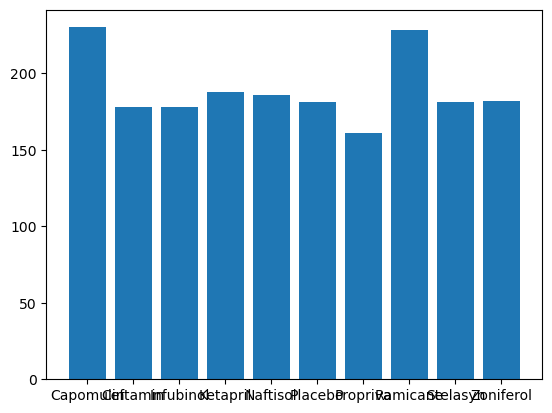

In [193]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_timepoint= combined_data.groupby(['Drug Regimen'])['Mouse ID'].count()
height = total_timepoint.values
print(height)

x_axis = total_timepoint.index.values
print(x_axis)
plt.bar(x_axis,height)

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64


<Axes: ylabel='Mouse ID'>

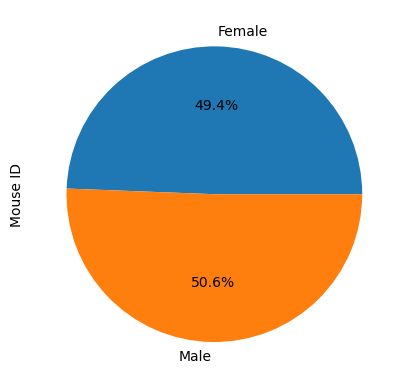

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice= combined_data.groupby(['Sex'])['Mouse ID'].count()
print(sex_mice)
sex_mice.plot.pie(autopct='%1.1f%%')



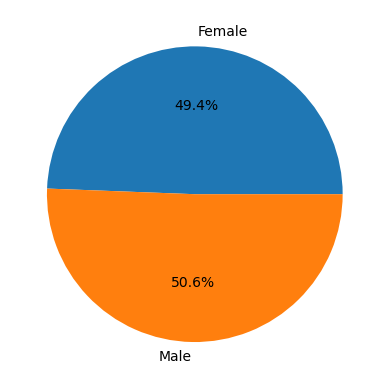

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values= [935, 958]

sex = ["Female", "Male"]
plt.pie(values, labels=sex,autopct="%1.1f%%" )

plt.show()

## Quartiles, Outliers and Boxplots

In [199]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

    #some sort of condition and union and binning 


# Start by getting the last (greatest) timepoint for each mouse
# Capomulin = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin",:].groupby(["Mouse ID"])["Timepoint"].max()
# Ramicane = combined_data.loc[combined_data["Drug Regimen"]=="Ramicane",:].groupby(["Mouse ID"])["Timepoint"].max()
# Infubinol = combined_data.loc[combined_data["Drug Regimen"]=="Infubinol",:].groupby(["Mouse ID"])["Timepoint"].max()
# Ceftamin = combined_data.loc[combined_data["Drug Regimen"]=="Ceftamin",:].groupby(["Mouse ID"])["Timepoint"].max()

max_time= combined_data.groupby(["Mouse ID"])["Timepoint"].max()
#max_time


#making treatments into datagrame 


merged_df= pd.merge(max_time,combined_data, on= ["Mouse ID","Timepoint"])
merged_df.head()


# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# #merging treatment dataframe to combined data




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [216]:
# Put treatments into a list for for loop (and later for plot labels)
# , , , and 
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

#looping through list
for x in treatment_list:
    treat = merged_df.loc[merged_df["Drug Regimen"]== x]
    vol = treat["Tumor Volume (mm3)"]
    
    tumor_vol_data.append(vol)
    
cap = tumor_vol_data[0]
print(cap)
ram = tumor_vol_data[1]
inf = tumor_vol_data[2]
ceft = tumor_vol_data[3]

#IQR for Cap
cap_iqr= cap.quantile([.25,0.5,0.75])
diff_cap = cap_iqr[0.75]-cap_iqr[0.25]

lb_cap = cap_iqr[0.25] - (1.5*diff_cap)
upp_cap = cap_iqr[0.75]+ (1.5*diff_cap)
print(f"Values below {lb_cap} and above {upp_cap} are outliers for Capomulin.")


#IQR for ram
ram_iqr= ram.quantile([0.25,0.5,0.75])
diff_ram = ram_iqr[0.75]- ram_iqr[0.25]

lb_ram = ram_iqr[0.25]- (1.5*diff_ram)
upp_ram = ram_iqr[0.75] + (1.5*diff_ram)
print(f"For Ramicane, values that are below {lb_ram} and above {upp_ram} are considered outliers. ")

#IQR for inf
inf_iqr = inf.quantile([0.25,0.5,0.75])
dif_inf= inf_iqr[0.75]- inf_iqr[0.25]

lb_inf= inf_iqr[0.25]- [1.5*dif_inf]
upp_inf= inf_iqr[0.75] + (1.5*dif_inf)
print(f"For Infubinol, values that are below {lb_inf} and above {upp_inf} are considered outliers. ")

#IQR for ceft
ceft_iqr = ceft.quantile([0.25,0.5,0.75])
diff_ceft = ceft_iqr[0.75]- ceft_iqr[0.25]

lb_ceft = ceft_iqr[0.25]- [1.5*dif_inf]
upp_ceft= ceft_iqr[0.75] + (1.5*dif_inf)
print(f"For Ceftamin, values that are below {lb_ceft} and above {upp_ceft} are considered outliers. ")



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#cap_merge_q = cap_merge["Total Volume mm3"].quantile([.25,0.5,0.75])
#cap_iqr = cap_merge_q[0.75]-cap_merge_q[0.25]

#cap_outliers = 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64
Values below 20.70456164999999 and above 51.83201549 are outliers for Capomulin.
For Ramicane, values that are below 17.912664470000003 and above 54.30681135 are considered outliers. 
For Infubinol, values that are below [36.83290495] and above 82.74144559000001 are considered outliers. 
For Ceftamin, values that are below [31.50637511] and above 81.51553277 are considered outliers. 


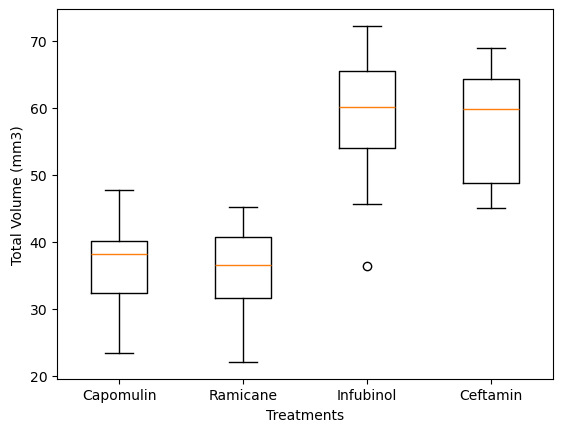

In [219]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.set_xlabel("Treatments")
ax1.set_ylabel("Total Volume (mm3)")
ax1.boxplot(tumor_vol_data,labels= treatment_list)

plt.show()

## Line and Scatter Plots

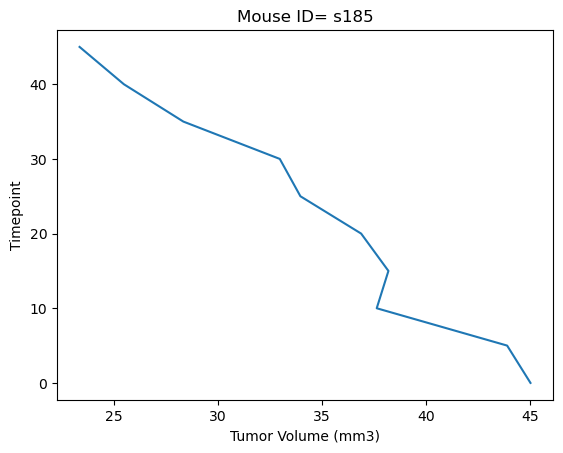

In [233]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#capomuline_mice = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
#print(capomuline_mice)
#picking id s185 randomly
mice_data = combined_data.loc[(combined_data["Mouse ID"]=="s185") & (combined_data["Drug Regimen"]=="Capomulin")] 

#set this to find necessary data 
#mice_data = capomuline_mice[capomuline_mice["Mouse ID"]==mice]

plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Mouse ID= s185")
plt.plot(mice_data["Tumor Volume (mm3)"], mice_data["Timepoint"])
plt.show()

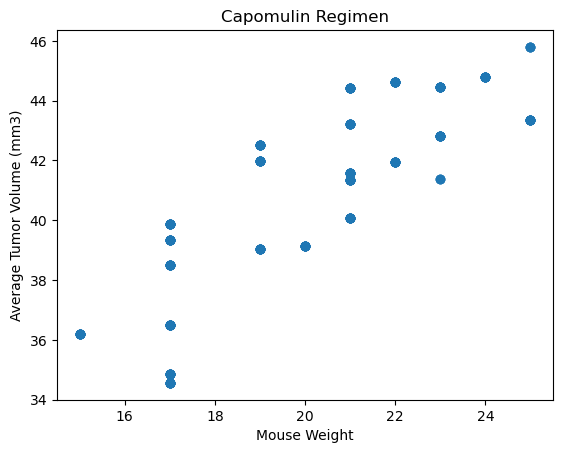

In [241]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomuline_mice = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
avg_tumor = capomuline_mice.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

cap_data_merged = pd.merge(avg_tumor, capomuline_mice, on=("Mouse ID"))
cap_data_merged.head()

plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regimen")
plt.scatter(cap_data_merged["Weight (g)"], cap_data_merged["Tumor Volume (mm3)_x"])
plt.show()

## Correlation and Regression

The Linear Equation follows that: y= 0.9609669432428362*weight(g) + 21.48982721329954
The Correlation coefficient is 0.8343958614425957


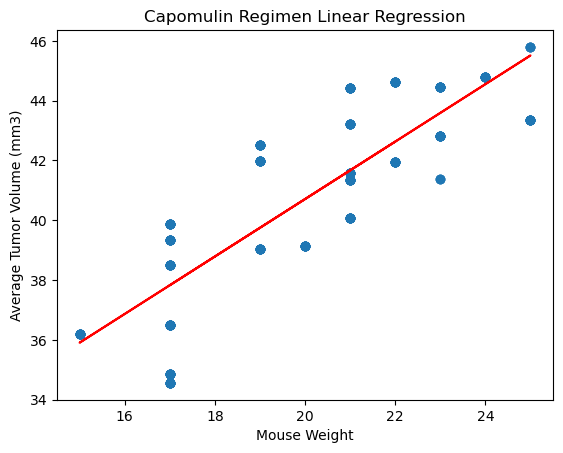

In [246]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_data_merged["Weight (g)"], cap_data_merged["Tumor Volume (mm3)_x"])
regress_values= cap_data_merged["Weight (g)"]*slope + intercept

print(f"The Linear Equation follows that: y= {slope}*weight(g) + {intercept}")
print(f"The Correlation coefficient is {rvalue}")

plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regimen Linear Regression")
plt.scatter(cap_data_merged["Weight (g)"], cap_data_merged["Tumor Volume (mm3)_x"])
plt.plot(cap_data_merged["Weight (g)"], regress_values, "r-")
plt.show()
